In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df_net = pd.read_csv(
    "dataset/Original/global/global-genre_network-2019.csv",
    sep="\t"
)

df_net.head()


,source,target,weight,avg_streams
0,latin,reggaeton,479,1.060468e+08
1,latin,latin,282,1.048953e+08
2,pop rap,rap,222,5.385630e+07
3,rap,trap,218,6.656220e+07
4,hip hop,rap,203,5.405006e+07


- source = first genre
- target = second genre
- weight = how many successful collaborations exist between them
- avg_streams = average number of streams for tracks using this pair

## Data Validation

In [3]:
print("Missing values:")
print(df_net.isnull().sum())

print("\nDuplicate rows:", df_net.duplicated().sum())


Missing values:
source         0
target         0
weight         0
avg_streams    0
dtype: int64

Duplicate rows: 0


## Collaboration Network Construction

In [4]:
G = nx.from_pandas_edgelist(
    df_net,
    source="source",
    target="target",
    edge_attr=["weight", "avg_streams"]
)

## Network Overview

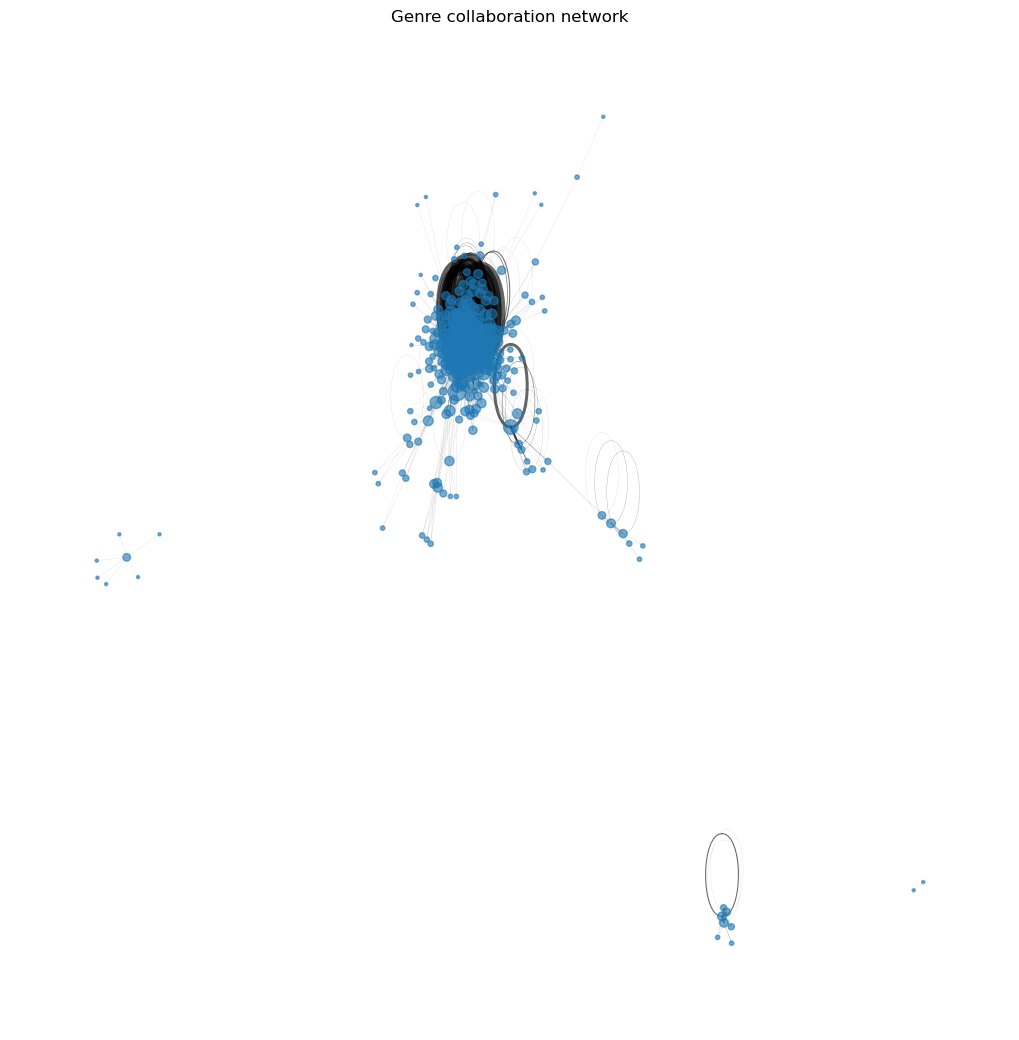

In [5]:
plt.figure(figsize=(10,10))

pos = nx.spring_layout(G, seed=42)

node_sizes = [G.degree(n)*5 for n in G.nodes()]
edge_widths = [G[u][v]["weight"]/20 for u,v in G.edges()]

nx.draw(
    G,
    pos,
    node_size=node_sizes,
    width=edge_widths,
    with_labels=False,
    alpha=0.6
)

plt.title("Genre collaboration network")
plt.show()


In [6]:
avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
weighted_degrees = dict(G.degree(weight="weight"))
avg_weighted_degree = sum(weighted_degrees.values()) / G.number_of_nodes()


components = list(nx.connected_components(G))
largest_component_size = len(max(components, key=len))
total_nodes = G.number_of_nodes()
percentage_in_largest = (largest_component_size / total_nodes) * 100
disconnected_nodes = total_nodes - largest_component_size
percentage_disconnected = (disconnected_nodes / total_nodes) * 100



print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())
print("Density:", nx.density(G))
print("Average degree:", avg_degree)
print("Average weighted degree:", avg_weighted_degree)
print("Connected components:", nx.number_connected_components(G))
print("Largest component size:", largest_component_size)
print("Percentage in largest component:", round(percentage_in_largest, 2), "%")
print("Disconnected nodes:", disconnected_nodes)
print("Percentage disconnected:", round(percentage_disconnected, 2), "%")


Nodes: 310
Edges: 2928
Density: 0.06113373003445036
Average degree: 18.89032258064516
Average weighted degree: 105.76774193548387
Connected components: 4
Largest component size: 294
Percentage in largest component: 94.84 %
Disconnected nodes: 16
Percentage disconnected: 5.16 %


## Network Structure Analysis

#### Node Degree Distirbution

In [7]:
degrees = [deg for _,deg in G.degree()]
pd.Series(degrees).describe()


count    310.000000
mean      18.890323
std       26.148584
min        1.000000
25%        5.000000
50%        9.000000
75%       21.000000
max      190.000000
dtype: float64

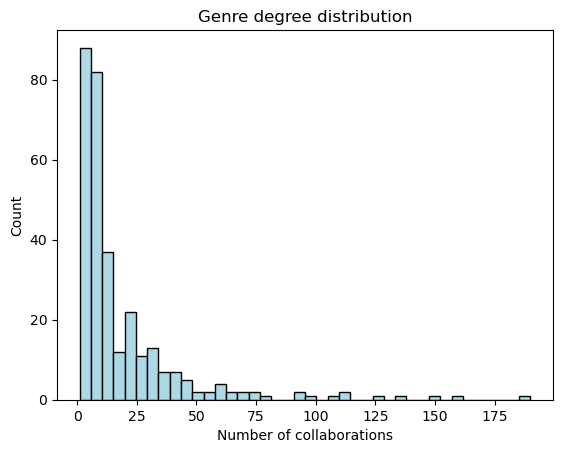

In [8]:

plt.hist(degrees, bins=40, color = "lightblue", edgecolor = "black")
plt.title("Genre degree distribution")
plt.xlabel("Number of collaborations")
plt.ylabel("Count")
plt.show()


#### Edge Weight Distirbution

In [9]:
weights = [d["weight"] for _,_,d in G.edges(data=True)]
pd.Series(weights).describe()


count    2928.000000
mean        5.599044
std        19.253929
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       479.000000
dtype: float64

Most genre pairs occur very few times (1–3)

A small number of pairs occur a lot (up to 479)

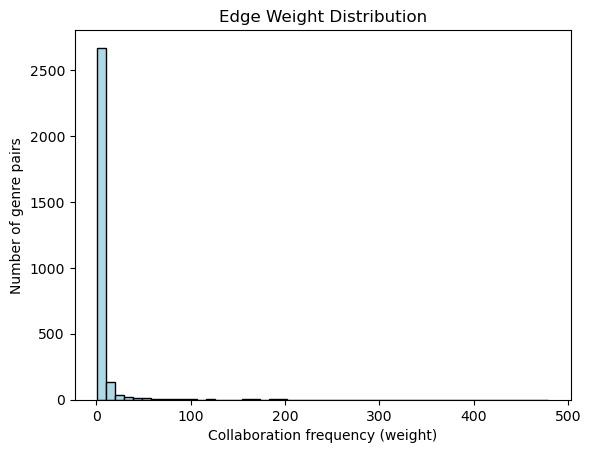

In [10]:
weights = [d["weight"] for _, _, d in G.edges(data=True)]
w = pd.Series(weights)

plt.figure()
plt.hist(w, bins=50, color = "lightblue", edgecolor = "black")
plt.title("Edge Weight Distribution")
plt.xlabel("Collaboration frequency (weight)")
plt.ylabel("Number of genre pairs")
plt.show()


#### Popularity Distribution

In [11]:
streams = [d["avg_streams"] for _,_,d in G.edges(data=True)]
pd.Series(streams).describe()


count    2.928000e+03
mean     5.619411e+07
std      6.677880e+07
min      4.104898e+06
25%      1.240201e+07
50%      3.295935e+07
75%      8.042885e+07
max      7.286733e+08
dtype: float64

Even the “least successful” edges in this file are still quite successful (millions of streams).

The distribution is very skewed (a few pairings are insanely successful - something we should take into consideration later, maybe even remove it(?)).

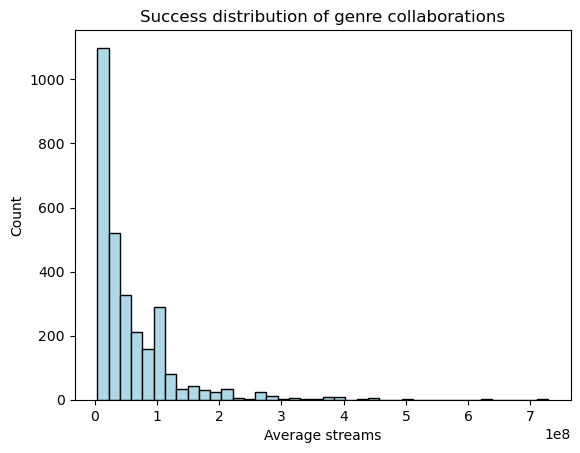

In [12]:
plt.hist(streams, bins=40, color = "lightblue", edgecolor = "black")
plt.title("Success distribution of genre collaborations")
plt.xlabel("Average streams")
plt.ylabel("Count")
plt.show()


## General Network Information

#### Top 10 genres with the highest collaboration count

In [13]:
sorted(G.degree, key=lambda x: x[1], reverse=True)[:10]


[('pop', 190),
 ('dance pop', 161),
 ('pop rap', 152),
 ('post-teen pop', 137),
 ('rap', 125),
 ('tropical house', 112),
 ('edm', 112),
 ('trap', 106),
 ('latin', 98),
 ('reggaeton', 93)]

#### Top 10 most frequently collaborating genres

In [14]:
sorted(G.edges(data=True), key=lambda x: x[2]["weight"], reverse=True)[:10]


[('latin', 'reggaeton', {'weight': 479, 'avg_streams': 106046838.22727272}),
 ('latin', 'latin', {'weight': 282, 'avg_streams': 104895305.03488372}),
 ('pop rap', 'rap', {'weight': 222, 'avg_streams': 53856301.00917431}),
 ('rap', 'trap', {'weight': 218, 'avg_streams': 66562200.67326733}),
 ('rap', 'hip hop', {'weight': 203, 'avg_streams': 54050063.56790123}),
 ('reggaeton',
  'reggaeton',
  {'weight': 197, 'avg_streams': 105055988.68115942}),
 ('latin', 'tropical', {'weight': 195, 'avg_streams': 107063300.45614035}),
 ('rap', 'rap', {'weight': 194, 'avg_streams': 55906963.36697248}),
 ('latin', 'trap latino', {'weight': 187, 'avg_streams': 119762208.56666666}),
 ('pop', 'pop', {'weight': 185, 'avg_streams': 100645552.49242423})]

#### Top 10 most successful collaboraitons 

In [15]:
sorted(G.edges(data=True), key=lambda x: x[2]["avg_streams"], reverse=True)[:10]


[('pop', 'hollywood', {'weight': 1, 'avg_streams': 728673266.0}),
 ('progressive electro house',
  'pop rock',
  {'weight': 1, 'avg_streams': 634161629.0}),
 ('brostep', 'pop rock', {'weight': 1, 'avg_streams': 634161629.0}),
 ('gangster rap', 'dfw rap', {'weight': 1, 'avg_streams': 505537957.0}),
 ('progressive electro house',
  'metropopolis',
  {'weight': 2, 'avg_streams': 454133585.5}),
 ('brostep', 'metropopolis', {'weight': 2, 'avg_streams': 454133585.5}),
 ('post-teen pop', 'etherpop', {'weight': 1, 'avg_streams': 442077913.0}),
 ('alternative r&b', 'etherpop', {'weight': 1, 'avg_streams': 442077913.0}),
 ('alternative r&b',
  'indie poptimism',
  {'weight': 1, 'avg_streams': 442077913.0}),
 ('hip hop', 'philly rap', {'weight': 1, 'avg_streams': 436803605.0})]

it means that collaboration frequency is not equal to popularity